# Heart Disease Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,mean_absolute_error,mean_squared_error,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
%matplotlib inline
from matplotlib import RcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
# store the data into a variable
cardio = pd.read_csv('dataset_heart.csv')

In [3]:
# Print the first 5 rows of the data
cardio.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Find the number of rows and columns in data
cardio.shape

(303, 14)

In [5]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Count the empyty values in each column
cardio.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# View some basic Satistics
cardio.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Count the no of Patients with and without heart disease
Counter(cardio.target)
#cardio['target'].value_counts()

Counter({1: 165, 0: 138})

In [9]:
# correlation of the columns
cardio.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


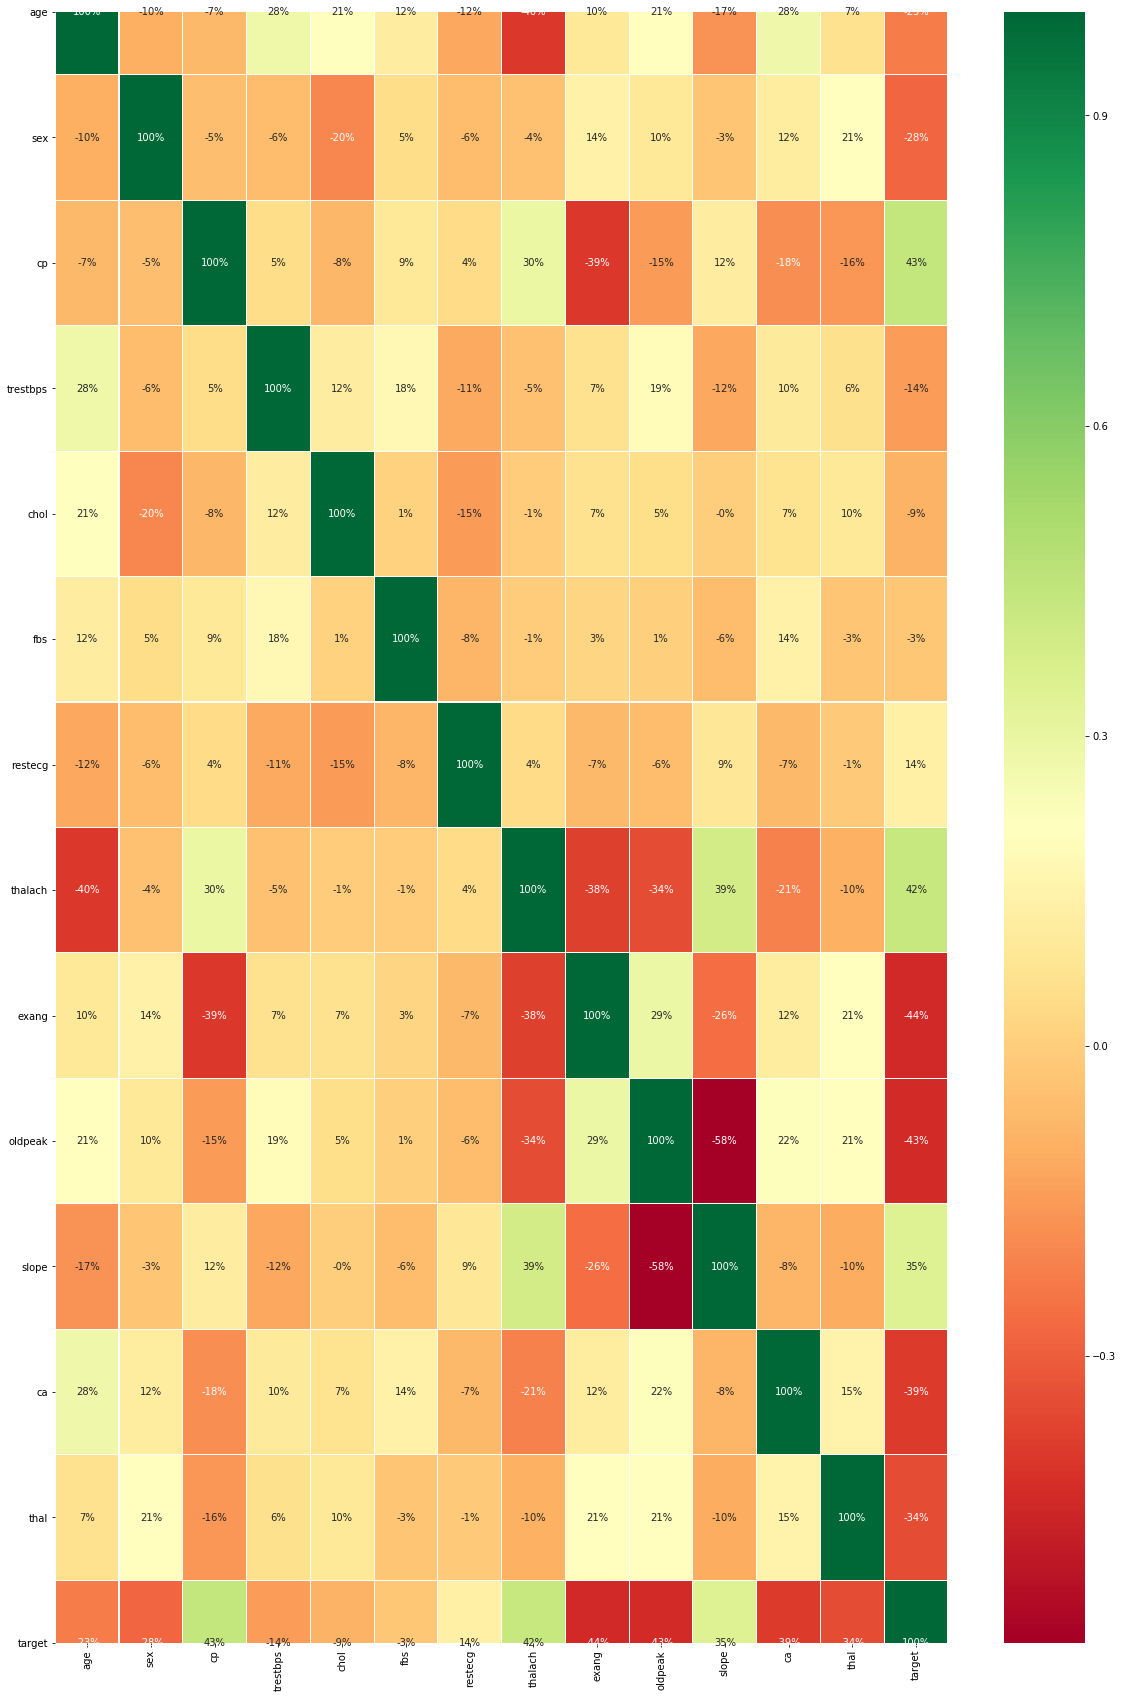

In [10]:
# Visualize the data using heat map
#plt.figure(figsize=(20,20))
fig=plt.gcf()
sns.heatmap(cardio.corr(),annot=True, fmt='.0%',cmap='RdYlGn',linewidths=0.1)
fig.set_size_inches(20,30)
plt.show()

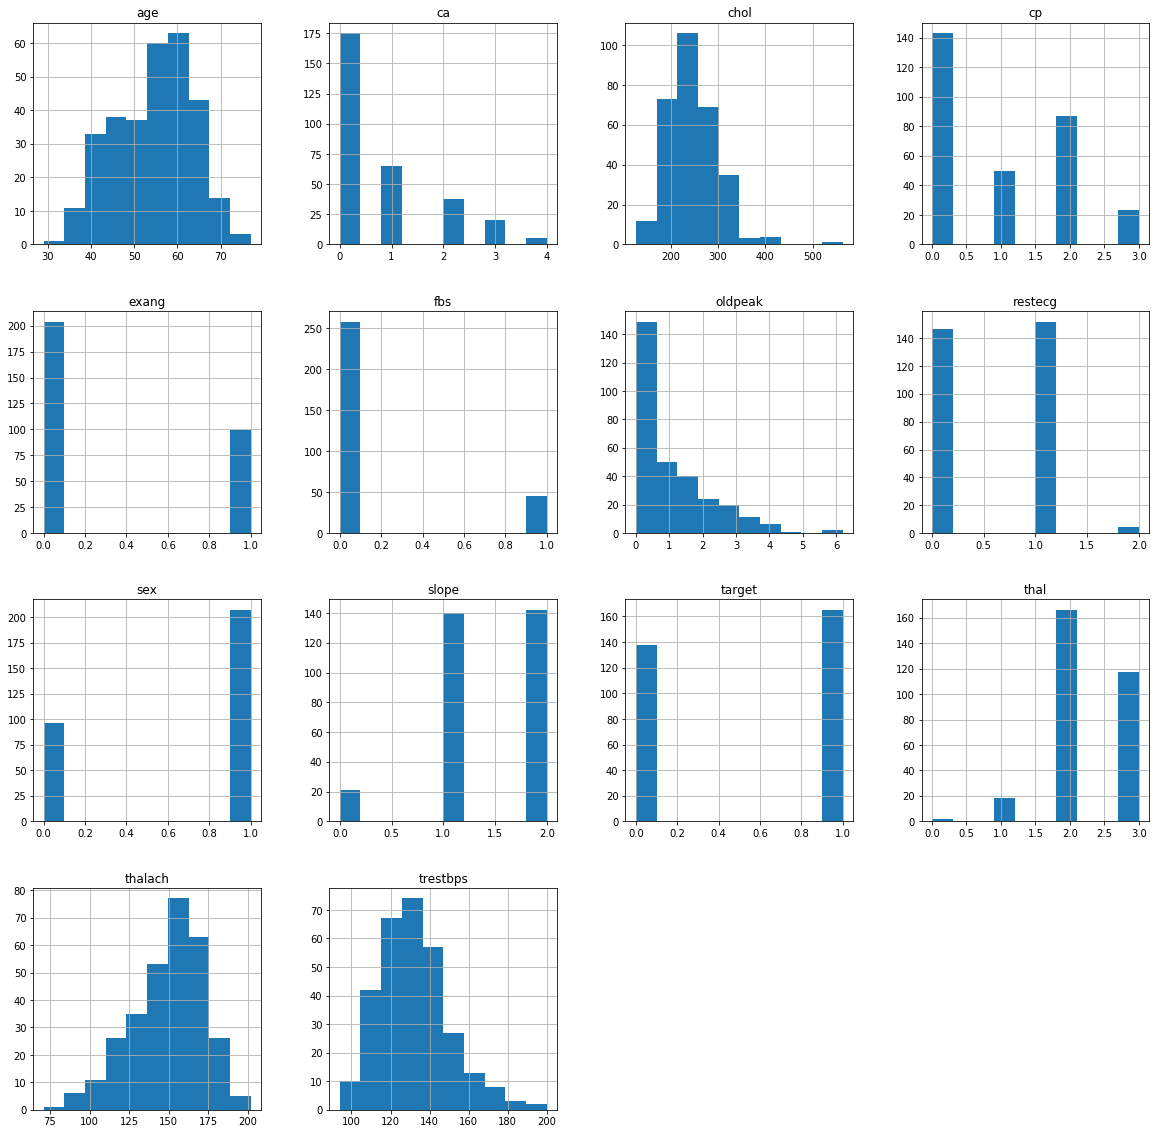

In [11]:
cardio.hist(figsize=(20,20))
plt.show()

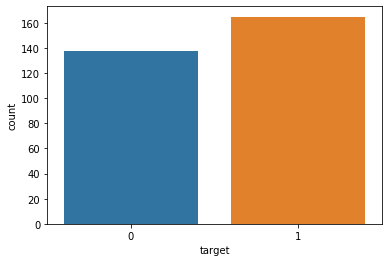

In [12]:
# Visualize the count of target
sns.countplot(cardio['target'])
plt.show()

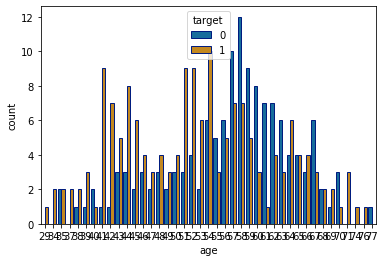

In [13]:
# Visualization of the entire data with age
ax=sns.countplot(x='age',hue='target',data= cardio,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

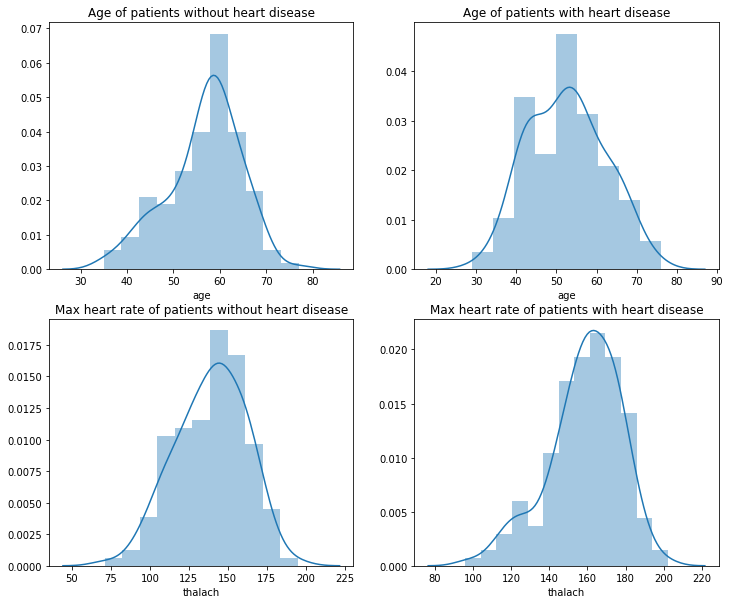

In [14]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(cardio[cardio['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(cardio[cardio['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(cardio[cardio['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(cardio[cardio['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [15]:
# converting some categorical variables into dummy variables
dataset = pd.get_dummies(cardio, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [16]:
# Feature scaling : scale the value in the data to be values in between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [17]:
# after scaling the entire data
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [18]:
# Split the data into feature data and target data
y = cardio['target']
X = cardio.drop(['target'], axis = 1)

In [19]:
X.shape

(303, 13)

In [20]:
y.shape

(303,)

In [21]:
# split the data as 70% training and 30% testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=10)

##  Algorithm 1: Random Forest 

In [22]:
model1 =RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=10)
model1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [23]:
#Test the model accuracy on the traning data
model1.score(X_train,y_train)

0.9905660377358491

In [24]:
#Test the model accuracy on the test data
y_predict = model1.predict(X_test)
pd.crosstab(y_test,y_predict)
acc_rad=accuracy_score(y_test,y_predict)*100
print(acc_rad)

83.51648351648352


In [25]:
print("Accuracy on training set: {:.3f}".format(model1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model1.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.835


## Algorithm 2 : KNearest Neighour

In [26]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)

In [27]:
acc_knn=accuracy_score(y_test,y_predict)*100
print(acc_knn)

68.13186813186813


In [28]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.741
Accuracy on test set: 0.681


In [29]:
# to calculate the errors against test value
print(classification_report(y_test,y_predict))
print('mean squared error is: ',mean_squared_error(y_test,y_predict))
print('mean absolute error is: ',mean_absolute_error(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.56      0.66        50
           1       0.61      0.83      0.70        41

    accuracy                           0.68        91
   macro avg       0.70      0.69      0.68        91
weighted avg       0.71      0.68      0.68        91

mean squared error is:  0.31868131868131866
mean absolute error is:  0.31868131868131866


In [30]:
# To check the best value of K in KNN algorithm
knn_score = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predict = knn.predict(X_test)
    score = accuracy_score(y_test,y_predict)
    knn_score.append(round(score,2))
print(knn_score)

[0.64, 0.62, 0.59, 0.67, 0.64, 0.68, 0.65, 0.66, 0.62, 0.65, 0.62, 0.6, 0.58, 0.58, 0.64, 0.66, 0.62, 0.64, 0.62, 0.64, 0.65, 0.66, 0.65, 0.65, 0.62, 0.63, 0.57, 0.57, 0.58]


Text(0.5, 1.0, 'K Neighbors Classifier scores for different k values')

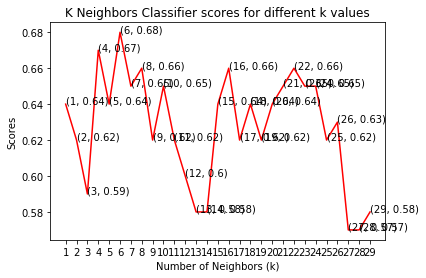

In [31]:
# Visualize the K value from the data
plt.plot([k for k in range(1,30)],knn_score,color = 'red')
for i in range(1,30):
    plt.text(i,knn_score[i-1],(i,knn_score[i-1]))
plt.xticks([i for i in range(1,30)])
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different k values')

## Algorithm 3 : Decision tree

In [32]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_predict=dt.predict(X_test)

In [33]:
acc_dec=accuracy_score(y_test,y_predict)*100
print(acc_dec)

75.82417582417582


In [34]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.758


In [35]:
y_predict

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [36]:
algorithms=['Random Forest','KNN','Decision Tree']
scores=[acc_rad,acc_knn,acc_dec]

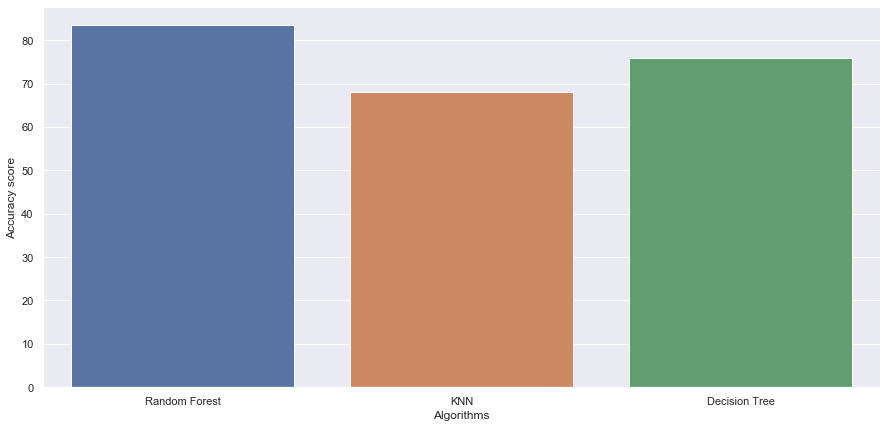

In [37]:
# Plot the comparision of the three algorithms
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
# Bar plot
sns.barplot(algorithms,scores)
plt.show()